In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Latvia'

link = 'https://rally-base.com/2023/tet-rally-liepaja-2023/?ssId='
startat, no_ss=7643, int(10) # starting number of url, count of Special Stages
canceled = [2]

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,5,Sesks M.,RC2,00:14:30.5,113.98 0.00,00:00:00.0 00:00:00.0,1,Latvia,1
2,2,2,Østberg M,RC2,00:14:46.9,111.87 0.60,00:00:16.4 00:00:16.4,1,Latvia,2
3,3,14,Virves Ro,RC2,00:14:48.2,111.70 0.64,00:00:17.7 00:00:01.3,1,Latvia,3
4,4,1,Paddon Ha,RC2,00:14:52.4,111.18 0.79,00:00:21.9 00:00:04.2,1,Latvia,4
5,5,3,Llarena E,RC2,00:14:57.0,110.61 0.96,00:00:26.5 00:00:04.6,1,Latvia,5
...,...,...,...,...,...,...,...,...,...,...
45,45,45,Kreuter N,RC4,00:11:34.8,98.18 6.90,00:02:10.7 00:00:09.9,10,Latvia,45
46,46,41,Kramer A.,RC4,00:11:37.2,97.84 7.02,00:02:13.1 00:00:02.4,10,Latvia,46
47,47,60,Orgus Kei,RC4,00:11:38.1,97.71 7.07,00:02:14.0 00:00:00.9,10,Latvia,47
48,48,36,Andersson,RC4,00:11:49.2,96.19 7.65,00:02:25.1 00:00:11.1,10,Latvia,48


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [7]:

rally2023_ClassView2

0                           Pos.                                
ss                            1   3   4   5   6   7   8   9   10
No. Crew       Group Race                                       
1   Paddon  Ha RC2   Latvia    4   3   2   3   7   3   3   8   1
2   Østberg  M RC2   Latvia    2  12   3   5   8   6   8   2   6
3   Llarena  E RC2   Latvia    5   7   9   9   4  14  13  14  12
4   Mabellini  RC2   Latvia   16  14  11  18   1  13  11  10  10
5   Sesks  M.  RC2   Latvia    1   1   1   1  13   1   1   3   1
6   Franceschi RC2   Latvia    9   9   5   7  11   5   5   4   5
7   Heikkilä   RC2   Latvia    7   6   4   2  18   2   2   1   7
8   Linnamäe   RC2   Latvia    5   7   7   4  16  15   7  11  11
9   McErlean   RC2   Latvia   10   5   8   6   5   4   6   6   3
10  Mareš  Fil RC2   Latvia   20   4  12  14   2   7   4   9   4
11  Cais  Erik RC2   Latvia   11  11  13  16   5  11   9  12   8
12  Rådström   RC2   Latvia   14  13  15  13  14  16  17  21  14
14  Virves  Ro RC2   Latvia    3   2   6   8   3   7  10   5  13
15  Campedelli RC2   Latvia    8  15  14  12  10  10  14   7   9
16  László  Ma RC2   Latvia   19  18  17  15  15  17  15  16  17
17  Pryce  Osi RC2   Latvia   13  16  10  10  17   9  12  13  16
18  Battistoll RC2   Latvia   12  17  16  11   9  12  16  15  15
19  Kołtun  J. RC2   Latvia   32  20  19  19  21  19  23  17  18
20  Cuzma  Bog RC2   Latvia   36  34  27  55  39  30  29  28  25
21  Bertolotti RC2   Latvia   43  30  42  34  27  38  45  29  33
50  Tiramani   RC2   Latvia   47  56  24  26  20  26  26  23   -
51  Uger  Serg RC2   Latvia   46  54  48  45  54  47  46  36  42
52  Mauro  Ale RC2   Latvia   21  33  28  32  31  27  43  25  27
53  Terlecki   RC2   Latvia   15  23  22  20  11  23  24  24  23
54  Potiiko  S RC2   Latvia   29  27  33  33  38  29  27  30  29
55  Korzun  An RC2   Latvia   27  26  35  35  48  28  50  38  28
61  Zakmans  I RC2   Latvia   49  51  50  58  52  54  51  48  44

In [8]:
rally2023_ClassView

0                           Pos.                                
ss                            1   3   4   5   6   7   8   9   10
No. Crew       Group Race                                       
1   Paddon  Ha RC2   Latvia    4   3   2   3   7   3   3   8   1
2   Østberg  M RC2   Latvia    2  12   3   5   8   6   8   2   6
3   Llarena  E RC2   Latvia    5   7   9   9   4  14  13  14  12
4   Mabellini  RC2   Latvia   16  14  11  18   1  13  11  10  10
5   Sesks  M.  RC2   Latvia    1   1   1   1  13   1   1   3   1
6   Franceschi RC2   Latvia    9   9   5   7  11   5   5   4   5
7   Heikkilä   RC2   Latvia    7   6   4   2  18   2   2   1   7
8   Linnamäe   RC2   Latvia    5   7   7   4  16  15   7  11  11
9   McErlean   RC2   Latvia   10   5   8   6   5   4   6   6   3
10  Mareš  Fil RC2   Latvia   20   4  12  14   2   7   4   9   4
11  Cais  Erik RC2   Latvia   11  11  13  16   5  11   9  12   8
12  Rådström   RC2   Latvia   14  13  15  13  14  16  17  21  14
14  Virves  Ro RC2   Latvia    3   2   6   8   3   7  10   5  13
15  Campedelli RC2   Latvia    8  15  14  12  10  10  14   7   9
16  László  Ma RC2   Latvia   19  18  17  15  15  17  15  16  17
17  Pryce  Osi RC2   Latvia   13  16  10  10  17   9  12  13  16
18  Battistoll RC2   Latvia   12  17  16  11   9  12  16  15  15
19  Kołtun  J. RC2   Latvia   32  20  19  19  21  19  23  17  18
20  Cuzma  Bog RC2   Latvia   36  34  27  55  39  30  29  28  25
21  Bertolotti RC2   Latvia   43  30  42  34  27  38  45  29  33
22  Armstrong  RC3   Latvia   18  10  18  17  23  18  21  19  19
23  Matulka  J RC3   Latvia   24  19  23  23  24  24  22  20  22
24  Parys  Pio RC3   Latvia   22  24  20  21  22  20  19  27  24
25  Soria  Pau RC3   Latvia   23  29  25  22  25  21  20  22  21
26  Nore  Ola  RC4   Latvia   33  50  29  29  44  31  35  37  40
27  Maior  Nor RC4   Latvia   37  55  36  38  35  42  31  31  32
28  Hansen  Vi RC4   Latvia   40  36  31  31  46  37  30  42  36
29  Daprà  Rob RC4   Latvia   38  38  45  43  37  44  40  47  39
30  Jalava  Mi RC4   Latvia   41  42  41  39  42  40   -   -   -
31  McRae  Max RC4   Latvia   34  31  37  37  40  33  38  33  38
32  Raftery  A RC4   Latvia   50  52  52  44  51  51  49  46  43
33  Zanin  Mat RC4   Latvia   44  47  51  49  41  49  47  45  41
34  Schulz  Ti RC4   Latvia   53  39  46  41  53  41  37  32  30
35  Johansson  RC4   Latvia   54  28  40  54  45  43  41  39  35
36  Andersson  RC4   Latvia   55  44  53  50  34  52  42  50  48
37  Vaher  Jas RC4   Latvia   31  25  30  27   -   -   -   -   -
38  Sei  Karl- RC4   Latvia   56  32  34  36  36  46  34   -   -
39  Noller  Re RC4   Latvia   45  46  54  51  50  53  48  52  49
40  Zeiringer  RC4   Latvia   57  57  57  56  55   -   -   -   -
41  Kramer  A. RC4   Latvia   52  48  56  52  49  55  52  51  46
44  Tiits  M.  RC4   Latvia   38  41  43  42  47  39  28  35  34
45  Kreuter  N RC4   Latvia   51  53  55  53  42  56  53  49  45
46  Hangodi  B RC4   Latvia   42  45  48  48  28  50  32  43  31
47  Kogure  Hi RC4   Latvia   30  43  38  28  33  32   -   -   -
48  Yamamoto   RC4   Latvia   25  35  32  30  30  34  33  41   -
49  Otake  Nao RC4   Latvia   28  37  39  40  26  35  39  40   -
50  Tiramani   RC2   Latvia   47  56  24  26  20  26  26  23   -
51  Uger  Serg RC2   Latvia   46  54  48  45  54  47  46  36  42
52  Mauro  Ale RC2   Latvia   21  33  28  32  31  27  43  25  27
53  Terlecki   RC2   Latvia   15  23  22  20  11  23  24  24  23
54  Potiiko  S RC2   Latvia   29  27  33  33  38  29  27  30  29
55  Korzun  An RC2   Latvia   27  26  35  35  48  28  50  38  28
56  Laskowski  RC3   Latvia   17  21  21  24  19  21  18  18  20
57  Kelly  Eam RC3   Latvia   25  22  26  25  28  25  25  26  26
58  Fontana  M RC4   Latvia   35  40  44  46  32  36  36  34  37
59  Schwarz  F RC4   Latvia   57  57  57  56  55  45   -   -   -
60  Orgus  Kei RC4   Latvia   48  49  47  47  55  48  44  44  47
61  Zakmans  I RC2   Latvia   49  51  50  58  52  54  51  48  44

In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,5,Sesks M.,RC2,1,Latvia,1,870.5
2,2,Østberg M,RC2,1,Latvia,2,886.9
3,14,Virves Ro,RC2,1,Latvia,3,888.2
4,1,Paddon Ha,RC2,1,Latvia,4,892.4
5,3,Llarena E,RC2,1,Latvia,5,897.0
...,...,...,...,...,...,...,...
45,45,Kreuter N,RC4,10,Latvia,45,694.8
46,41,Kramer A.,RC4,10,Latvia,46,697.2
47,60,Orgus Kei,RC4,10,Latvia,47,698.1
48,36,Andersson,RC4,10,Latvia,48,709.2


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race   ss          
Latvia 1      870.5
       3      346.6
       4      804.0
       5      441.8
       6      137.9
       7      608.8
       8      577.2
       9      608.6
       10     564.1

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,5,Sesks M.,RC2,1,Latvia,1,870.5,870.5
1,2,Østberg M,RC2,1,Latvia,2,886.9,870.5
2,14,Virves Ro,RC2,1,Latvia,3,888.2,870.5
3,1,Paddon Ha,RC2,1,Latvia,4,892.4,870.5
4,3,Llarena E,RC2,1,Latvia,5,897.0,870.5
...,...,...,...,...,...,...,...,...
494,45,Kreuter N,RC4,10,Latvia,45,694.8,564.1
495,41,Kramer A.,RC4,10,Latvia,46,697.2,564.1
496,60,Orgus Kei,RC4,10,Latvia,47,698.1,564.1
497,36,Andersson,RC4,10,Latvia,48,709.2,564.1


In [12]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,5,Sesks M.,RC2,1,Latvia,1,870.5,870.5,0.0,0.000000,01
1,2,Østberg M,RC2,1,Latvia,2,886.9,870.5,16.4,1.883975,01
2,14,Virves Ro,RC2,1,Latvia,3,888.2,870.5,17.7,2.033314,01
3,1,Paddon Ha,RC2,1,Latvia,4,892.4,870.5,21.9,2.515796,01
4,3,Llarena E,RC2,1,Latvia,5,897.0,870.5,26.5,3.044227,01
...,...,...,...,...,...,...,...,...,...,...,...
494,45,Kreuter N,RC4,10,Latvia,45,694.8,564.1,130.7,23.169651,10
495,41,Kramer A.,RC4,10,Latvia,46,697.2,564.1,133.1,23.595107,10
496,60,Orgus Kei,RC4,10,Latvia,47,698.1,564.1,134.0,23.754653,10
497,36,Andersson,RC4,10,Latvia,48,709.2,564.1,145.1,25.722390,10


In [13]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC2')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,5,Sesks M.,RC2,1,Latvia,1,870.5,870.5,0.0,0.000000,01
1,2,Østberg M,RC2,1,Latvia,2,886.9,870.5,16.4,1.883975,01
2,14,Virves Ro,RC2,1,Latvia,3,888.2,870.5,17.7,2.033314,01
3,1,Paddon Ha,RC2,1,Latvia,4,892.4,870.5,21.9,2.515796,01
4,3,Llarena E,RC2,1,Latvia,5,897.0,870.5,26.5,3.044227,01
...,...,...,...,...,...,...,...,...,...,...,...
477,55,Korzun An,RC2,10,Latvia,28,624.2,564.1,60.1,10.654139,10
478,54,Potiiko S,RC2,10,Latvia,29,629.5,564.1,65.4,11.593689,10
482,21,Bertolotti,RC2,10,Latvia,33,636.2,564.1,72.1,12.781422,10
491,51,Uger Serg,RC2,10,Latvia,42,659.3,564.1,95.2,16.876440,10


In [14]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,5,Sesks M.,RC2,1,Latvia,1,870.5,870.5,0.0,0.000000,01
1,2,Østberg M,RC2,1,Latvia,2,886.9,870.5,16.4,1.883975,01
2,14,Virves Ro,RC2,1,Latvia,3,888.2,870.5,17.7,2.033314,01
3,1,Paddon Ha,RC2,1,Latvia,4,892.4,870.5,21.9,2.515796,01
4,3,Llarena E,RC2,1,Latvia,5,897.0,870.5,26.5,3.044227,01
...,...,...,...,...,...,...,...,...,...,...,...
477,55,Korzun An,RC2,10,Latvia,28,624.2,564.1,60.1,10.654139,10
478,54,Potiiko S,RC2,10,Latvia,29,629.5,564.1,65.4,11.593689,10
482,21,Bertolotti,RC2,10,Latvia,33,636.2,564.1,72.1,12.781422,10
491,51,Uger Serg,RC2,10,Latvia,42,659.3,564.1,95.2,16.876440,10


In [15]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Latvia                                                        
SS.            01     03     04      05    06     07     08     09     10
Crew                                                                     
Battistoll   46.6   16.2   40.1    14.6   3.2   13.6   28.7   30.6   22.0
Bertolotti  131.6   46.5  142.1    76.0  10.4  104.2  106.8   92.5   72.1
Cais  Erik   43.9    9.2   36.3    22.7   2.0   13.2   11.4   15.8   10.5
Campedelli   35.1   12.6   36.5    14.7   3.9   13.1   19.5    7.2   12.6
Cuzma  Bog  110.3   47.8  112.9   271.2  17.1   89.7   82.8   88.2   54.5
Franceschi   35.4    8.1   17.4     8.7   4.8    4.0    8.3    3.2    7.5
Heikkilä     33.7    6.4   14.1     0.4   7.1    0.3    4.3    0.0   10.0
Korzun  An   81.3   44.1  127.7    76.6  23.6   85.6  139.6  109.0   60.1
Kołtun  J.   97.8   22.3   76.6    42.2   8.5   43.6   54.4   42.0   29.0
Linnamäe     26.5    7.7   20.0     3.6   6.2   15.2   10.2   15.5   14.4
Llarena  E   26.5    7.7   28.1    12.2   1.4   14.5   18.6   21.7   15.4
László  Ma   62.5   17.6   44.6    20.9   5.9   32.9   26.3   38.3   24.6
Mabellini    57.4   12.5   33.7    29.4   0.0   13.9   15.4   13.7   12.9
Mareš  Fil   65.7    5.5   35.1    16.3   0.4   10.2    7.4   10.8    6.8
Mauro  Ale   71.8   47.3  117.3    75.3  11.2   72.7   98.2   66.4   55.3
McErlean     35.9    6.1   21.1     6.9   2.0    0.9    9.5    6.8    2.5
Paddon  Ha   21.9    0.8    5.9     2.8   2.1    0.7    5.2    9.8    0.0
Potiiko  S   87.1   44.9  125.9    75.6  16.6   89.6   81.0   93.7   65.4
Pryce  Osi   48.2   14.4   31.1    12.5   7.0   13.0   18.2   21.0   23.9
Rådström     49.0   10.4   37.3    14.9   5.8   17.3   32.2   60.8   20.8
Sesks  M.     0.0    0.0    0.0     0.0   5.2    0.0    0.0    2.6    0.0
Terlecki     54.5   33.7   86.5    43.2   4.8   52.3   61.0   63.0   45.8
Tiramani    138.3  110.3   92.3    60.1   8.4   65.5   72.0   62.6    NaN
Uger  Serg  137.1   76.2  169.0    93.4  35.7  119.4  110.6  102.5   95.2
Virves  Ro   17.7    0.3   19.5     9.1   1.1   10.2   11.6    6.2   19.9
Zakmans  I  140.0   71.2  169.4  1418.4  31.4  149.1  140.1  149.7  120.8
Østberg  M   16.4    9.4    8.4     4.9   2.7    7.3   10.9    2.2    9.6

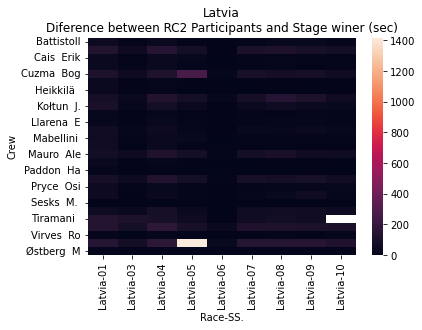

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC2 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

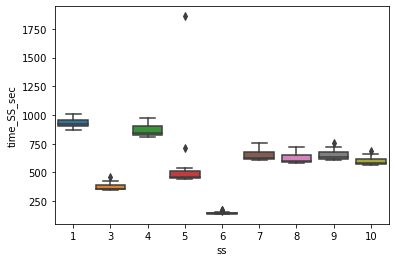

In [18]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

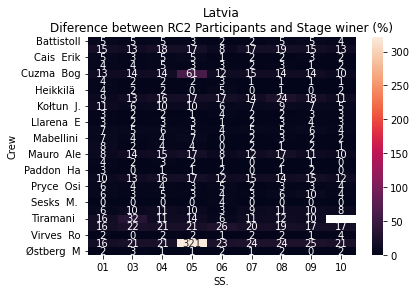

In [19]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC2 Participants and Stage winer (%)')
plt.savefig("Rc2.jpg")